# Pytorch로 시작하는 딥러닝 입문 : RNN
이번 챕터에서는 RNN(순환 신경망)에 대해서 이해하고, RNN의 장기 의존성 문제를 보완한 LSTM, 그리고 RNN과 LSTM을 이용하여 각종 딥러닝 실습을 진행해보겠습니다.



RNN(Recurrent Neural Network)은 시퀀스(Sequence) 모델입니다. 입력과 출력을 시퀀스 단위로 처리하는 모델입니다. 번역기를 생각해보면 입력은 번역하고자 하는 문장. 즉, 단어 시퀀스입니다. 출력에 해당되는 번역된 문장 또한 단어 시퀀스입니다. 이러한 시퀀스들을 처리하기 위해 고안된 모델들을 시퀀스 모델이라고 합니다. 그 중에서도 RNN은 딥 러닝에 있어 가장 기본적인 시퀀스 모델입니다.

# 1. 순환 신경망(Recurrent Neural Network, RNN)
앞서 배운 신경망들은 전부 은닉층에서 활성화 함수를 지난 값은 오직 출력층 방향으로만 향했습니다. 이와 같은 신경망들을 피드 포워드 신경망(Feed Forward Neural Network)이라고 합니다. 그런데 그렇지 않은 신경망들이 있습니다. RNN(Recurrent Neural Network) 또한 그 중 하나입니다. RNN은 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 갖고있습니다.

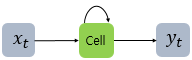


x는 입력층의 입력 벡터,
y는 출력층의 출력 벡터입니다. 실제로는 편향
b도 입력으로 존재할 수 있지만 앞으로의 그림에서는 생략합니다. RNN에서 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드를 셀(cell)이라고 합니다. 이 셀은 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행하므로 이를 메모리 셀 또는 RNN 셀이라고 표현합니다.

은닉층의 메모리 셀은 각각의 시점(time step)에서 바로 이전 시점에서의 은닉층의 메모리 셀에서 나온 값을 자신의 입력으로 사용하는 재귀적 활동을 하고 있습니다. 앞으로는 현재 시점을 변수 t로 표현하겠습니다. 이는 현재 시점 t에서의 메모리 셀이 갖고있는 값은 과거의 메모리 셀들의 값에 영향을 받은 것임을 의미합니다. 그렇다면 메모리 셀이 갖고 있는 이 값은 뭐라고 부를까요?

메모리 셀이 출력층 방향으로 또는 다음 시점 t+1의 자신에게 보내는 값을 은닉 상태(hidden state)라고 합니다. 다시 말해 t 시점의 메모리 셀은 t-1 시점의 메모리 셀이 보낸 은닉 상태값을 t 시점의 은닉 상태 계산을 위한 입력값으로 사용합니다.

이제 RNN에 대한 수식을 정의해보겠습니다.
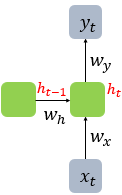

현재 시점 t에서의 은닉 상태값을 $$h_t$$
라고 정의하겠습니다. 은닉층의 메모리 셀은 $$h_t$$
를 계산하기 위해서 총 두 개의 가중치를 갖게 됩니다. 하나는 입력층에서 입력값을 위한 가중치 $$W_x$$
이고, 하나는 이전 시점 t-1의 은닉 상태값인 $$h_{t-1}$$
을 위한 가중치 $$W_h$$
입니다.

이를 식으로 표현하면 다음과 같습니다.
은닉층:
$$h_{t} = tanh(W_{x} x_{t} + W_{h}h_{t−1} + b)$$
출력층:
$$y_{t} = f(W_{y}h_{t} + b)$$


이때
를 계산하기 위한 활성화 함수로는 주로 하이퍼볼릭탄젠트 함수(tanh)가 사용되지만, ReLU로 바꿔 사용하는 시도도 있습니다.


위의 식에서 각각의 가중치
$$W_x$$ $$W_h$$ $$W_y$$
의 값은 모든 시점에서 값을 동일하게 공유합니다. 만약, 은닉층이 2개 이상일 경우에는 은닉층 2개의 가중치는 서로 다릅니다.

출력층에서 결과값을 계산하기 위한 활성화 함수는 상황에 따라 다를텐데, 예를 들어서 이진 분류를 해야하는 경우라면 시그모이드 함수를 사용할 수 있고 다양한 카테고리 중에서 선택해야하는 문제라면 소프트맥스 함수를 사용하게 될 것입니다.



# 2.파이썬으로 RNN 구현하기
직접 Numpy로 RNN층을 구현해보겠습니다.

일단 실제 구현에 앞서 간단하게 pseudocode를 작성해보겠습니다.

In [3]:
# pseudocode

hidden_state_t = 0 # 초기 hidden state를 0 벡터로 초기화

for input_t in input_length: # 각 시점마다 입력이 들어옴
  output_t = tanh(input_t, hidden_state_t) # 각 시점에 대해 입력과 은닉 상태를 갖고 연산
  hidden_state_t = output_t # 계산 결과는 현재 시점의 hidden state가 된다.

NameError: name 'input_length' is not defined

우선 t 시점의 은닉 상태를 hidden_state_t라는 변수로 선언하였고, 입력 데이터의 길이를 input_length로 선언하였습니다. 이 경우, 입력 데이터의 길이는 곧 총 시점의 수(timesteps)가 됩니다. 그리고 t 시점의 입력값을 input_t로 선언하였습니다. 각 메모리 셀은 각 시점마다 input_t와 hidden_sate_t(이전 상태의 은닉 상태)를 입력으로 활성화 함수인 하이퍼볼릭탄젠트 함수를 통해 현 시점의 hidden_state_t를 계산합니다.

이제 RNN 층을 실제 동작되는 코드로 구현해보겠습니다. 아래의 코드는 이해를 돕기 위해 (timesteps, input_size) 크기의 2D 텐서를 입력으로 받았다고 가정하였으나, 실제로 파이토치에서는 (batch_size, timesteps, input_size)의 크기의 3D 텐서를 입력으로 받는 것을 기억합시다.

In [4]:
import numpy as np

timesteps = 10 # 시점의 수. NLP에서는 보통 문장의 길이가 된다.
input_size = 4 # 입력의 차원. NLP에서는 보통 단어 벡터의 차원이 된다.
hidden_size = 8 # 은닉 상태의 크기. 메모리 셀의 용량이다.

inputs = np.random.random((timesteps, input_size)) # 입력에 해당되는 2D 텐서

hidden_state_t = np.zeros((hidden_size,)) # 초기 은닉 상태는 0(벡터)로 초기화
# 은닉 상태의 크기 hidden_size로 은닉 상태를 만듦.

우선 시점, 입력의 차원, 은닉 상태의 크기, 그리고 초기 은닉 상태를 정의했습니다. 현재 초기 은닉 상태는 0의 값을 갖는 벡터로 초기화가 된 상태입니다. 초기 은닉 상태를 출력해보겠습니다.

In [5]:
print(hidden_state_t)

[0. 0. 0. 0. 0. 0. 0. 0.]


은닉 상태의 크기를 8로 정의하였으므로 8의 차원을 가지는 0의 값으로 구성된 벡터가 출력됩니다. 이제 가중치와 편향을 정의합니다.

In [6]:
Wx = np.random.random((hidden_size, input_size))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_size, hidden_size)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_size,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

In [7]:
print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

(8, 4)
(8, 8)
(8,)


각 가중치와 편향의 크기는 다음과 같습니다. Wx는 (은닉 상태의 크기 × 입력의 차원),

Wh는 (은닉 상태의 크기 × 은닉 상태의 크기),

b는 (은닉 상태의 크기)의 크기를 가집니다.

이제 모든 시점의 은닉 상태를 출력한다고 가정하고, RNN 층을 동작시켜봅시다.



In [8]:
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b) # Wx * Xt + Wh * Ht-1 + b(bias)
  total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태의 값을 계속해서 축적
  print(np.shape(total_hidden_states)) # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0)
# 출력 시 값을 깔끔하게 해준다.

print(total_hidden_states) # (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.94911927 0.70496518 0.89407199 0.73258568 0.96091277 0.87544012
  0.89993658 0.71338312]
 [0.99943557 0.99996703 0.99994782 0.99990713 0.99983788 0.99960094
  0.99999422 0.99994746]
 [0.99905637 0.99999076 0.99995968 0.99998602 0.99979463 0.9997602
  0.9999988  0.99999018]
 [0.99981002 0.99999367 0.99998478 0.99998521 0.99992369 0.99987136
  0.99999957 0.99999103]
 [0.9994915  0.99999042 0.99996104 0.99997052 0.99979712 0.99956596
  0.9999991  0.99997855]
 [0.99989671 0.99999621 0.99998057 0.99999348 0.99995181 0.99989845
  0.99999983 0.99999587]
 [0.99979163 0.99999622 0.99997836 0.9999945  0.99994523 0.99987557
  0.99999979 0.99999637]
 [0.99966351 0.99999392 0.99997995 0.99998746 0.99991054 0.99982168
  0.99999952 0.99999185]
 [0.99987156 0.99999676 0.99998894 0.99999462 0.99996726 0.99991722
  0.99999984 0.99999679]
 [0.9997207  0.99999517 0.99997794 0.99999336 0.99992818 0.99988441
  0.99999966 0.99999572]]

# 3. 파이토치의 nn.RNN()

파이토치에서는 nn.RNN()을 통해서 RNN 셀을 구현합니다. 실습을 통해 이해해봅시다. 우선 필요한 파이토치의 도구들을 임포트합니다.

In [9]:
import torch
import torch.nn as nn

이제 입력의 크기와 hidden state의 크기를 정의합니다.
hidden state의 크기는 대표적인 RNN의 하이퍼파라미터입니다.
여기서 입력의 크기는 매 시점마다 들어가는 입력의 크기를 의미합니다.

In [10]:
input_size = 5 # 입력의 크기
hidden_size = 8 # 은닉 상태의 크기

입력 텐서를 정의합니다.
입력 텐서는 (배치 크기 × 시점의 수 × 매 시점마다 들어가는 입력)의 크기를 가집니다. 여기서는 배치 크기는 1, 10번의 시점동안 5차원의 입력 벡터가 들어가도록 텐서를 정의합니다.

In [11]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

이제 nn.RNN()을 사용해서 RNN 셀을 만듭니다.

인자로 입력의 크기, hidden state의 크기를 정의해주고,

batch_first = True를 통해

입력 텐서의 첫번째 차원이 배치 크기임을 알려줍시다.

In [12]:
cell = nn.RNN(input_size, hidden_size, batch_first=True)

입력 텐서를 RNN 셀에 입력하여 출력을 확인해봅시다.

In [13]:
outputs, _status = cell(inputs)

RNN 셀은 두 개의 입력을 리턴하는데,

첫 번째 리턴값은 모든 시점의 은닉 상태들이며,

두 번째 리턴값은 마지막 시점의 은닉 상태입니다.

우선 첫번째 리턴값에 대해 크기를 확인해봅시다.

In [14]:
print(outputs.shape) # 모든 시점의 은닉 상태

torch.Size([1, 10, 8])


첫번째 리턴값의 은닉 상태들은 (1, 10, 8)의 크기를 가집니다.

이는 10번의 시점동안 8차원의 은닉상태가 출력되었다는 의미입니다.

두번째 리턴값.

다시 말해 마지막 시점의 은닉 상태의 크기를 확인해보겠습니다.

In [15]:
print(_status.shape) # 최종 시점의 은닉 상태

torch.Size([1, 1, 8])


마지막 시점의 은닉 상태는 (1,1,8)의 크기를 가집니다.

# 4. 깊은 순환 신경망 (Deep Recurrent Neural Network)

앞서 RNN도 다수의 은닉층을 가질 수 있다고 언급한 바 있습니다.
예를 들어 은닉층이 1개 더 추가되어 은닉층이 2개인 깊은 순환 신경망을 이룰 수 있습니다.

이런 경우 첫번째 은닉층은 다음 은닉층에 모든 시점에 대해 은닉 상태 값을 다음 은닉층으로 보내주고 있습니다.

깊은 순환 신경망을 파이토치로 구현할 때는 nn.RNN()의 인자인 num_layers에 값을 전달하여 층을 쌓습니다.

층이 2개인 깊은 순환 신경망의 경우, 앞서 실습했던 임의의
입력에 대해 출력이 어떻게 달라지는지 확인해봅시다.

In [16]:
# (batch_size, time_steps, input_size)

inputs = torch.Tensor(1, 10, 5)

In [17]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True)

In [19]:
outputs, _status = cell(inputs)

In [20]:
print(outputs.shape)

torch.Size([1, 10, 8])


첫번째 리턴값의 크기는 층이 1개였던 RNN 셀 때와 달라지지 않았습니다.

여기서는 마지막 층의 모든 시점이 은닉 상태들입니다.

In [21]:
print(_status.shape) # (층의 개수, 배치 크기, 은닉 상태의 크기)

torch.Size([2, 1, 8])


두 번째 리턴값의 크기는 층이 1개였던 RNN 셀 때와 달라졌는데, 여기서 크기는 (층의 개수, 배치 크기, 은닉 상태의 크기)에 해당됩니다.

# 5. 양방향 순환 신경망(Bidirectional Recurrent Neural Network)


양방향 순환 신경망은 시점 t에서의 출력값을 예측할 때 이전 시점의 데이터뿐만 아니라, 이후 데이터로도 예측할 수 있다는 아이디어에 기반합니다.

영어 빈칸 채우기 문제에 비유하여 보겠습니다.

영어 빈칸 채우기 문제에 비유하여 보겠습니다.



Exercise is very effective at [          ] belly fat.

1) reducing
2) increasing
3) multiplying


'운동은 복부 지방을 [ ] 효과적이다'라는 영어 문장이고,

정답은 reducing(줄이는 것)입니다.

그런데 위의 영어 빈 칸 채우기 문제를 잘 생각해보면 정답을 찾기 위해서는 이전에 나온 단어들만으로는 부족합니다. 목적어인 belly fat(복부 지방)를 모르는 상태라면 정답을 결정하기가 어렵습니다.

즉, RNN이 과거 시점(time step)의 데이터들을 참고해서, 찾고자하는 정답을 예측하지만

실제 문제에서는 과거 시점의 데이터만 고려하는 것이 아니라 향후 시점의 데이터에 힌트가 있는 경우도 많습니다.

그래서 이전 시점의 데이터뿐만 아니라, 이후 시점의 데이터도 힌트로 활용하기 위해서 고안된 것이 양방향 RNN입니다.

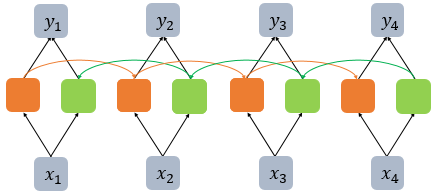

양방향 RNN은 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용합니다.

첫번째 메모리 셀은 앞에서 배운 것처럼 앞 시점의 은닉 상태(Forward States)를 전달받아 현재의 은닉 상태를 계산합니다.

위의 그림에서는 주황색 메모리 셀에 해당됩니다.

두번째 메모리 셀은 앞에서 배운 것과는 다릅니다.

앞 시점의 은닉 상태가 아니라 뒤 시점의 은닉 상태(Backward States)를 전달 받아 현재의 은닉 상태를 계산합니다.


위의 그림에서는 초록색 메모리 셀에 해당됩니다. 그리고 이 두 개의 값 모두가 출력층에서 출력값을 예측하기 위해 사용됩니다.

양방향 순환 신경망을 파이토치로 구현할 때는 nn.RNN()의 인자인 bidirectional에 값을 True로 전달하면 됩니다.

 이번에는 층이 2개인 깊은 순환 신경망이면서 양방향인 경우, 앞서 실습했던 임의의 입력에 대해서 출력이 어떻게 달라지는지 확인해봅시다.

In [22]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [23]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True, bidirectional = True)

In [24]:
outputs, _status = cell(inputs)

In [25]:
print(outputs.shape) #(배치 크기, 시퀀스 길이, 은닉 상태의 크기 x 2)

torch.Size([1, 10, 16])


첫번째 리턴값의 크기는 단방향 RNN 셀 때보다 은닉 상태의 크기의 값이 두 배가 되었습니다.

여기서는 (배치 크기, 시퀀스 길이, 은닉 상태의 크기 x 2)의 크기를 가집니다.

이는 양방향의 은닉 상태 값들이 연결(concatenate)되었기 때문입니다.



In [26]:
print(_status.shape) # (층의 개수 x 2, 배치 크기, 은닉 상태의 크기)

torch.Size([4, 1, 8])


In [27]:
torch.Size([4, 1, 8])

torch.Size([4, 1, 8])

두 번째 리턴값의 크기는 (층의 개수x2, 배치 크기, 은닉 상태의 크기)를 가집니다. 이는 정방향 기준으로는 마지막 시점에 해당하면서, 역방향 기준에서는 첫번째 시점에 해당되는 시점의 출력값을 층의 개수만큼 쌓아 올린 결과값입니다.

# LSTM (Long Short-Term Memory)

바닐라 RNN 이후 바닐라 RNN의 한계를 극복하기 위한 다양한 RNN의 변형이 나왔습니다.

이번 챕터에서 배우게 될 LSTM도 그 중 하나입니다. 앞으로의 설명에서 LSTM과 비교하여 RNN을 언급하는 것은 전부 바닐라 RNN을 말합니다.

## 1. Vanilla RNN의 한계

앞에서 바닐라 RNN은 출력 결과가 이전의 계산 결과에 의존한다는 것을 언급한 바 있습니다.

하지만 바닐라 RNN은 비교적 짧은 시퀀스에 대해서만 효과를 보인다는 단점이 있습니다.

바닐라 RNN의 시점(timestep)이 길어질수록 앞의 정보가 뒤로 충분히 전달되지 못하는 현상이 발생합니다.

어쩌면 가장 중요한 정보가 시점의 앞 쪽에 위치할 수도 있습니다.

이를 장기 의존성 문제(Long-Term Dependency)라고 합니다.

## 2. LSTM(Long Short-Term Memory)

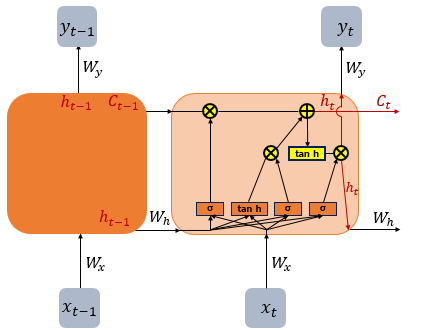

위의 그림은 LSTM의 전체적인 내부의 모습을 보여줍니다.
LSTM은 은닉층의 메모리 셀에 입력 게이트, 망각 게이트, 출력 게이트를 추가해서 불필요한 기억을 지우고, 기억해야 할 것들을 정합니다.

요약하면 LSTM은 은닉 상태(hidden state)를 계산하는 식이 전통적인 RNN보다 조금 더 복잡해졌으며 셀 상태(cell state)라는 값을 추가했습니다.

위의 그림에서는 t기점의 셀 상태를 $$C_t$$ 로 표현하고 있습니다.



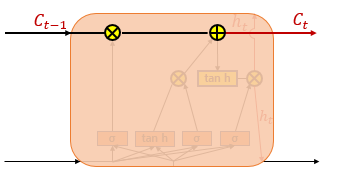

셀 상태는 위의 그림에서 왼쪽에서 오른쪽으로 가는 굵은 선입니다.

셀 상태 또한 이전에 배운 은닉 상태처럼 이전 시점의 셀 상태가 다음 시점의 셀 상태를 구하기 위한 입력으로서 사용됩니다.

은닉 상태값과 셀 상태값을 구하기 위해서 새로 추가 된 3개의 게이트를 사용합니다.

각 게이트는 삭제 게이트, 입력 게이트, 출력 게이트라고 부르며

이 3개의 게이트에는 공통적으로 시그모이드 함수가 존재합니다.

시그모이드 함수를 지나면 0과 1사이의 값이 나오게 되는데 이 값들을 갖고 게이트를 조절합니다.

아래의 내용을 먼저 이해하고 각 게이트에 대해 알아보도록 하겠습니다.

- 이하 식에서 σ는 시그모이드 함수를 의미합니다
- 이하 식에서 tanh는 하이퍼볼릭탄젠트 함수를 의미합니다
- $$W_{xi}, W_{xg}, W_{xf}, W_{xo}$$ 는 $$x_t$$와 함께 각 게이트에서 사용되는 4개의 가중치입니다.
- $$W_{hi}, W_{hg}, W_{hf}, W_{ho}$$는 $$h_{t-1}$$와 함께 각 게이트에서 사용되는 4개의 가중치입니다.
- $$b_{i}, b_{g}, b_{f}, b_{o}$$는 각 게이트에서 사용되는 4개의 편향입니다.

## 입력 게이트

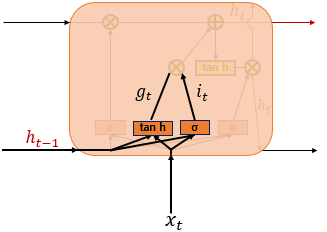

$$i_{t}=σ(W_{xi}x_{t}+W_{hi}h_{t-1}+b_{i})$$

$$g_{t}=tanh(W_{xg}x_{t}+W_{hg}h_{t-1}+b_{g})$$

입력 게이트는 현재 정보를 기억하기 위한 게이트입니다.
우선 현재 시점 t의 x값과 입력 게이트로 이어지는 가중치
$$W_{xi}$$를 곱한 값과 이전 시점 t-1의 은닉 상태가 입력 게이트로 이어지는 가중치 $$W_{hi}$$를 곱한 값을 더하여 시그모이드 함수를 지납니다.
이를 $$i_t$$라고 합니다.

그리고 현재 시점 t의 x값과 입력 게이트로 이어지는 가중치
$$W_{xg}$$를 곱한 값과 이전 시점 t-1의 은닉 상태가 입력 게이트로 이어지는 가중치 $$W_{hg}$$룰 곱한 값을 더하여 하이퍼볼릭 탄젠트 함수를 지납니다.
이를 $$g_t$$라고 합니다.

시그모이드 함수를 지나 0과 1 사이의 값과 하이퍼볼릭탄젠트 함수를 지나 01과 1사이의 값 두개가 나오게 됩니다.
이 두 개의 값을 갖고 이번에 선택된 기억할 정보의 양을 정하는데
구체적으로 어떻게 결정하는지는 아래에서 배우게 될 셀 상태 수식을 보면 됩니다.



## 삭제 게이트
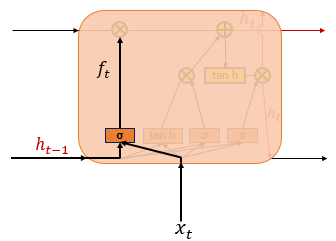

$$f_{t}=σ(W_{xf}x_{t}+W_{hf}h_{t-1}+b_{f})$$

삭제 게이트는 기억을 삭제하기 위한 게이트입니다.
현재 시점 t의 x값과 이전 시점 t-1의 은닉 상태가 시그모이드 함수를 지나게 됩니다.
시그모이드 함수를 지나면 0과 1 사이의 값이 나오게 되는데,
이 값이 곧 삭제 과정을 거친 정보의 양입니다.

0에 가까울수록 정보가 많이 삭제된 것이고 1에 가까울 수록 정보를 온전히 기억한 것입니다.

이를 갖고 셀 상태를 구하게 되는데, 구체적으로는 아래의 셀 상태 수식을 보면 됩니다.

## 셀 상태(장기 상태)

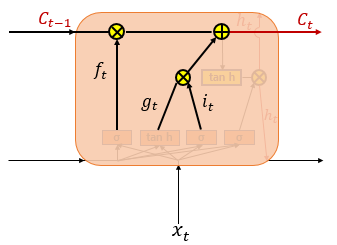

$$C_{t}=f_{t}∘C_{t-1}+i_{t}∘g_{t}$$

셀 상태 $$C_t$$를 LSTM에서는 장기 상태라고 부르기도 합니다.

그렇다면 셀 상태를 구하는 방법을 알아보겠습니다.

현재 삭제 게이트에서 일부 기억을 잃은 상태입니다.

입력 게이트에서 구한 $$i_t, g_t$$ 이 두 개의 값에 대해서 원소별 곱(entrywise product)을 진행합니다.
다시 말해 같은 크기의 두 행렬이 있을 때 같은 위치의 성분끼리 곱하는 것을 말합니다.

그런 다음 입력 게이트에서 선택된 기억을 삭제 게이트의 결과값과 더합니다.

이 값을 현재 시점 t의 셀 상태라고 하며, 이 값은 다음 t+1 시점의 LSTM셀로 넘겨집니다.

삭제 게이트와 입력 게이트의 영향력을 이해해봅시다.

만약 삭제 게이트의 출력값인 $$f_t$$가 0이 된다면, 이전 시점의 셀 상태값인 $$C_{t-1}$$은 현재 시점의 셀 상태값을 결정하기 위한 영향력이 0이 되면서, 오직 입력 게이트의 결과만이 현재 시점의 셀 상태값 $$C_t$$을 결정할 수 있습니다.

이는 삭제 게이트가 완전히 닫히고 입력 게이트를 연 상태를 의미합니다.

반대로 입력 게이트의 $$i_t$$ 값을 0이라고 한다면, 현재 시점의 셀 상태값 $$C_t$$은 오직 이전 시점의 셀 상태값 $$C_{t-1}$$의 값에만 의존합니다.
이는 입력 게이트를 완전히 닫고 삭제 게이트만을 연 상태를 의미합니다.
결과적으로 삭제 게이트는 이전 시점의 입력을 얼마나 반영할지를 의미하고 입력 게이트는 현재 시점의 입력을 얼마나 반영할지를 결정합니다.

## 출력 게이트와 은닉 상태(단기 상태)
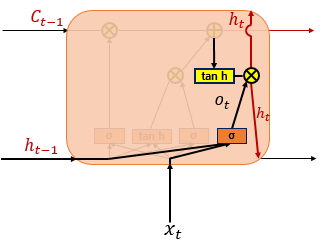

$$o_{t}=σ(W_{xo}x_{t}+W_{ho}h_{t-1}+b_{o})$$
$$h_{t}=o_{t}∘tanh(c_{t})$$

출력 게이트는 현재 시점 t의 x값과 이전 시점 t-1의 은닉 상태가 시그모이드 함수를 지난 값입니다.
해당 값은 현재 시점 t의 은닉 상태를 결정하는 일에 쓰이게 됩니다.

은닉 상태를 단기 상태라고 하기도 합니다.
은닉 상태는 장기 상태의 값이 하이퍼볼릭탄젠트 함수를 지나 -1과 1사이의 값입니다.
해당 값은 출력 게이트의 값과 연산되면서, 값이 걸러지는 효과가 발생합니다.
단기 상태의 값은 또한 출력층으로도 향합니다.

## 파이토치의 nn.LSTM()

파이토치에서 LSTM 셀을 사용하는 방법은 매우 간단합니다.
기존에 RNN 셀을 사용하려고 했을 때는 다음과 같이 사용했습니다.

In [ ]:
nn.RNN(input_dim, hidden_size, batch_first=True)

LSTM 셀은 이와 유사하게 다음과 같이 사용합니다.

In [ ]:
nn.LSTM(input_dim, hidden_size, batch_fisrt=True)

## 문자 단위 RNN(Char RNN)

이번 챕터에서는 모든 시점의 입력에 대해서 모든 시점에 대해서 출력을 하는 다대다 RNN을 구현해봅시다.
다대다 RNN은 대표적으로 품사 태깅, 개체명 인식 등에서 사용됩니다.

# 문자 단위 RNN(Char RNN)
RNN의 입출력의 단위가 단어 레벨(word-level)이 아니라 문자 레벨(character-level)로 하여 RNN을 구현한다면, 이를 문자 단위 RNN이라고 합니다.
RNN 구조 자체가 달라진 것은 아니고, 입출력의 단위가 문자로 바뀌었을 뿐입니다. 문자 단위 RNN을 다대다 구조로 구현해봅시다.

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 훈련 데이터 전처리하기

여기서는 문자 시퀀스 apple을 입력받으면 pple!을 출력하는 RNN을 구현해볼겁니다.
이렇게 구현하는 이유에는 어떤 의미가 있지는 않습니다.
그저 RNN의 동작을 이해하기 위한 목적입니다.

입력 데이터와 레이블 데이터에 대해서 문자 집합(vocabulary)을 만듭니다.
여기서 문자 집합은 중복을 제거한 문자들의 집합입니다.


In [29]:
input_str = 'apple'
label_str = 'pple!'
char_vocab = sorted(list(set(input_str+label_str)))
vocab_size = len(char_vocab)
print('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합의 크기 : 5


현재 문자 집합에는 총 5개의 문자가 있습니다.
!,a,e,l,p 입니다.

이제 하이퍼파라미터를 정의해줍니다.
이때 입력은 원-핫 벡터를 사용할 것이므로 입력의 크기는 문자 집합의 크기여야 합니다.

In [30]:
input_size = vocab_size # 입력의 크기는 문자 집합의 크기
hidden_size = 5
output_size = 5
learning_rate = 0.1

이제 문자 집합에 고유한 정수를 부여합니다.

In [31]:
char_to_index = dict((c, i) for i, c in enumerate(char_vocab))
print(char_to_index)

{'!': 0, 'a': 1, 'e': 2, 'l': 3, 'p': 4}


!은 0

a는 1

e는 2

l은 3

p는 4

가 부여됐습니다.

나중에 예측 결과를 다시 문자 시퀀스로 보기 위해서
반대로 정수로부터 문자를 얻을 수 있는 index_to_char을 만듭니다.

In [32]:
index_to_char={}
for key, value in char_to_index.items():
    index_to_char[value] = key
print(index_to_char)

{0: '!', 1: 'a', 2: 'e', 3: 'l', 4: 'p'}


이제 입력 데이터와 레이블 데이터의 각 문자들을 정수로 매핑합니다.

In [33]:
x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]
print(x_data)
print(y_data)

[1, 4, 4, 3, 2]
[4, 4, 3, 2, 0]


파이토치의 nn.RNN()은 기본적으로 3차원 텐서를 입력받습니다.

그렇기 때문에 배치 차원을 추가해줍니다.

In [34]:
# 배치 차원 추가
# 텐서 연산인 unsqueeze(0)를 통해 해결할 수도 있다.
x_data = [x_data]
y_data = [y_data]
print(x_data)
print(y_data)

[[1, 4, 4, 3, 2]]
[[4, 4, 3, 2, 0]]


입력 시퀀스의 각 문자들을 원-핫 벡터로 바꿔줍니다.

In [35]:
x_one_hot = [np.eye(vocab_size)[x] for x in x_data]
print(x_one_hot)

[array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])]


입력 데이터와 레이블 데이터를 텐서로 바꿔줍니다.

In [36]:
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

<ipython-input-36-c1bfbd518a63>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  X = torch.FloatTensor(x_one_hot)


이제 각 텐서의 크기를 확인해보겠습니다.

In [37]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([1, 5, 5])
레이블의 크기 : torch.Size([1, 5])


# 모델 구현하기
이제 RNN 모델을 구현해봅시다. 아래에서 fc는 fully connected layer를 의미하며 출력층으로 사용됩니다.

In [41]:
class Net(torch.nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(Net, self).__init__()
    self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True) # RNN 셀 구현
    self.fc = torch.nn.Linear(hidden_size, output_size, bias=True) # 출력층 구현

  def forward(self, x): # 구현한 RNN 셀과 출력층을 연결
      x, _status = self.rnn(x)
      x = self.fc(x)
      return x

클래스로 정의한 모델을 net에 저장합니다.

In [42]:
net = Net(input_size, hidden_size, output_size)

이제 입력된 모델에 입력을 넣어서 출력의 크기를 확인해봅시다.

In [43]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([1, 5, 5])


(1,5,5)의 크기를 가지는데 각각 배치 차원, 시점, 출력의 크기입니다.
나중에 정확도를 측정할 때는 이를 모두 펼쳐서 계산하게 되는데, 이때는 view를 사용하여 배치 차원과 시점 차원을 하나로 만듭니다.

In [45]:
print(outputs.view(-1, input_size).shape) #2차원 텐서로 변환

torch.Size([5, 5])


In [46]:
torch.Size([5,5])

torch.Size([5, 5])

차원이 (5,5)가 된 것을 볼 수 있습니다. 이제 레이블 데이터의 크기를 다시 복습해봅시다.

In [47]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([1, 5])
torch.Size([5])


레이블 데이터는 (1,5)의 크기를 갖는데, 마찬가지로 나중에 정확도를 측정할 때는 이걸 펼쳐서 계산할 예정입니다. 이 경우 (5)의 크기를 갖게 됩니다. 이제 옵티마이저와 손실 함수를 정의합시다.

In [48]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

총 100번의 에포크를 학습합니다.

In [49]:
for i in range(100):
  optimizer.zero_grad()
  outputs = net(X)
  loss = criterion(outputs.view(-1, input_size), Y.view(-1)) # view를 하는 이유는 Batch 차원 제거를 위해
  loss.backward()
  optimizer.step() # 위에서 optimizer 선언 시 넣어둔 파라미터 업데이트

  # 아래는 모델이 실제 어떻게 예측했는지를 확인하기 위한 코드
  result = outputs.data.numpy().argmax(axis=2)
  result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
  print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  1.743497610092163 prediction:  [[0 1 1 1 1]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  !aaaa
1 loss:  1.4929311275482178 prediction:  [[0 2 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  !ele!
2 loss:  1.2813503742218018 prediction:  [[4 3 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  plle!
3 loss:  1.0708674192428589 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
4 loss:  0.8862333297729492 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
5 loss:  0.7405171394348145 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
6 loss:  0.6162558794021606 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
7 loss:  0.5135535001754761 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
8 loss:  0.423300564289093 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
9 loss:  0.339761346578598 prediction:  [[4 4 3 2 0]] tru